In [12]:
from keras.datasets import cifar10
from keras.utils import np_utils
import numpy as np
from PIL import Image
import matplotlib as plt
from matplotlib import pyplot as ppl

/home/umang/.local/lib/python2.7/site-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/home/umang/.local/lib/python2.7/site-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/home/umang/.local/lib/python2.7/site-packages/h5py/_hl/group.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import h5g, h5i, h5o, h5r, h5t, h5l, h5p
Using TensorFlow backend.
/home/umang/.local/lib/python2.7/site-packages/scipy/sparse/lil.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/home/umang/.local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:165:

In [13]:
##LOading the data
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

In [14]:
##Let's analyse the data we have
print('Training_set:{}'.format(X_train.shape))
print('Testing_set: {}'.format(X_test.shape))

Training_set:(50000, 32, 32, 3)
Testing_set: (10000, 32, 32, 3)


In [15]:
## Each image represents  a 32 by 32 pixels with 3 characteristics rows each
print(X_train[0].shape)

(32, 32, 3)


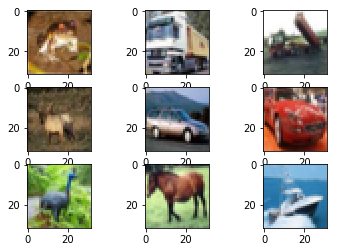

In [16]:
## Creating a grid of 3 by 3 
for i in range(0,9):
    ppl.subplot(330 + 1 + i)
    img = X_train[i]
    ppl.imshow(img)
    
##Showing the images
ppl.show()

In [17]:
##Preprocessing the data

##Normalize the entire data 
seed = 8
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

## Coverting all the 0-255 rgb values to 0.0 to 1.0
X_train = X_train / 255.0
X_test = X_test/ 255.0
print(X_train.shape)
print(X_train)

(50000, 32, 32, 3)
[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 

In [18]:
print(y_train.shape)

(50000, 1)


In [19]:
## The 'y' values that we get is a single value between 0 and 9
## SO we convert this number to a 1 by 10 vector 

Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

print(Y_train.shape)
print(y_train[0])

(50000, 10)
[6.]


In [20]:
##Building the all_CNN network. 

##The following are the CNN layers 
# Input 32 by 32 RGB Images
# 3 by 3 convolutional layer, 96 Relu
# 3 by 3 convolutional layer, 96 Relu
# 3 by 3 max-pooling stride 2
# 3 by 3 convolutional layer, 192 Relu
# 3 by 3 convolutional layer, 192 Relu
# 3 by 3 max-pooling stride 2
# 3 by 3 convolutional layer, 192 Relu
# 3 by 3 convolutional layer, 192 Relu
# 1 by 1 convolutional layer, 192 Relu
# 1 by 1 convolutional layer, 192 Relu
# 1 by 1 convolutional layer, 10 Relu
# global averaging ober the 6 by 6 spatial dimensions
# 10 or 100 way- softmax


In [21]:
## Satrt by importing the necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D,GlobalAveragePooling2D
from keras.optimizers import SGD

In [22]:
## defining model type as sequential
##same padding produces an extra layer of padding around the origial image to keep the consistency of the image whereas 
##padding doesn't. 


def allcnn(weights = None):   ##THe default weights are None
    
 ##Relu is just an activation function 
    model  = Sequential()

 ##Adding the model layers
    model.add(Conv2D(96,(3,3), padding = 'same' , input_shape = (32,32,3))) ## 96 parameter, a 3 by 3 matrix,
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3) , padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3) , padding = 'same' , strides = (2,2)))
    model.add(Dropout(0.5)) ##Drop half the neurons randomly and helps the model generalize preventing overfitting 

    model.add(Conv2D(192 , (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3) , padding = 'same' , strides = (2,2)))
    model.add(Dropout(0.5)) ##Drop half the neurons randomly and helps the model generalize preventing overfitting 

    model.add(Conv2D(192 , (3,3), padding = 'same')) ## this padding doesn't add the additional padding layer around the image
    model.add(Activation('relu'))
    model.add(Conv2D(192 , (1,1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10 , (1,1), padding = 'valid'))

##adding the GLobal Average Pooling Layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))

##loading the weights
    if weights:
        model.load_weights(weights) ##loading all the weights passed in the parameter 

##Returning the model
    return model 



In [23]:
# ## Used for training the model
# ## Drfining hyperparamters 

# learning_rate = 0.01
# weight_decay = 1e-6
# momentum = 0.9

# ##Building the model and loading the pretrained weights 
# weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
# model = allcnn(weights)

# ##Defining the Optimizer and compliing the model
# sgd = SGD(lr = learning_rate , decay = weight_decay, momentum = momentum, nesterov = True)
# model.compile(loss = 'categorical_crossentropy' , optimizer = sgd)

# ##printing model accuracy
# print model.summary()

# ##defining the additional training parameters
# epochs = 350
# batch_size = 32

# ##fitting the model
# model.fit(X_train,Y_train,validation_data = (X_test,Y_test), epochs = epochs , batch_size = batch_size , verbose = 1)

In [24]:
## Used for testing the model
## Drfining hyperparamters 

learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

##Building the model and loading the pretrained weights 
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

##Defining the Optimizer and compliing the model
sgd = SGD(lr = learning_rate , decay = weight_decay, momentum = momentum, nesterov = True)
model.compile(loss = 'categorical_crossentropy' , optimizer = sgd , metrics = ['accuracy'])

##printing model accuracy
print model.summary()

##testing ans deeing the accuracy scores
scores = model.evaluate(X_test,Y_test,verbose = 1)
print('Accuracy: {}'.format(scores[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)       166080    
__________

In [25]:
print(scores)

[0.49941776103731245, 0.9088]


In [106]:
classes = range(0,10)
names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

##zip the names and classes to make the class labels i.e. class number with its correponding name
class_labels = dict(zip(classes,names))
print(class_labels)
print(class_labels[3])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
cat


In [113]:
##generating a batch of 9 images to predict on

batch = X_test[4000:4009]
labels = np.argmax(Y_test[4000:4009],axis = -1)

print (labels[3])
##generating the predictions
print(Y_test[0])
print(np.argmax(Y_test[0],axis = -1))

##making the predictions
predictions = model.predict(batch,verbose = 1)


2
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
3
9/9 [==============================] - 0s 14ms/step


In [114]:
##Generating all the class results 
class_results = np.argmax(predictions , axis = -1)
print(len(class_results))

9


In [115]:
##Each of the predictions is an array of 10 values where each valie represents the probobility of the image being in that class

for img in predictions:
    print(np.sum(img))


1.0
1.0000001
0.9999998
1.0000001
1.0
0.99999994
1.0
1.0
1.0


In [116]:
## Converting class lrobailities to class labels
## Argmax will us back that index(in actual sense , the class, which has the highest probabilty of the image belonging to)

class_results = np.argmax(predictions,axis = -1)
print(class_results)

[2 2 4 0 0 5 8 6 8]


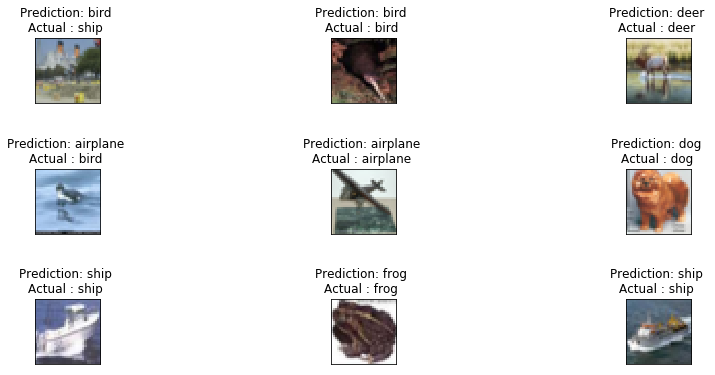

In [117]:
##Plotting the 20 images
##The actual values are the Y_test ones as we are predicitng on the X_test. 
## class_results have all the prediction classes and the labels has the actual classes
## class_lables has all the index with the respecctive classes in them. 

##Creating a grid of 10 by 10 images
fig, axs = ppl.subplots(3,3,figsize = (15,6)) 
fig.subplots_adjust(hspace = 1) ##for giving spaces between each of the rows
axs = axs.flatten()

for i,img in enumerate(batch):
    
    ##determing the class for each img and setting the title accordingly
    for key, value in class_labels.items():
        if key == class_results[i]:
            title = 'Prediction: {} \nActual : {} '.format(class_labels[key],class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False) ##removing the x axis from the image 
            axs[i].axes.get_yaxis().set_visible(False) ##removing the y axis from the image 
            
    ##plotting the image
    axs[i].imshow(img)
    
##showing the plots
ppl.show()